In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
df = pd.read_csv('data_decision_tree.csv')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6816 entries, 0 to 6815
Columns: 194 entries, iid to amb5_3
dtypes: float64(173), int64(13), object(8)
memory usage: 10.1+ MB


In [8]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [9]:
# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])

# checking whether any other columns contain a " "
df_categorical.apply(lambda x: x=='', axis=0).sum()

field       0
undergra    0
mn_sat      0
tuition     0
from        0
zipcode     0
income      0
career      0
dtype: int64

In [10]:
from sklearn import preprocessing


# encode categorical variables using Label Encoder

# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,field,undergra,mn_sat,tuition,from,zipcode,income,career
0,Law,NaN,NaN,NaN,Chicago,"60,521","69,487.00",lawyer
1,Law,NaN,NaN,NaN,Chicago,"60,521","69,487.00",lawyer
2,Law,NaN,NaN,NaN,Chicago,"60,521","69,487.00",lawyer
3,Law,NaN,NaN,NaN,Chicago,"60,521","69,487.00",lawyer
4,Law,NaN,NaN,NaN,Chicago,"60,521","69,487.00",lawyer


In [11]:
#Converting the data types of all columns to strings
le = preprocessing.LabelEncoder()
df_categorical_2 = df_categorical.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [12]:
# apply Label encoder to df_categorical_2

le = preprocessing.LabelEncoder()
df_categorical_2 = df_categorical_2.apply(le.fit_transform)
df_categorical_2.head()

,field,undergra,mn_sat,tuition,from,zipcode,income,career
0,103,226,68,115,41,215,188,256
1,103,226,68,115,41,215,188,256
2,103,226,68,115,41,215,188,256
3,103,226,68,115,41,215,188,256
4,103,226,68,115,41,215,188,256


In [13]:
# concat df_categorical_2 with original df
df = df.drop(df_categorical_2.columns, axis=1)
df = pd.concat([df, df_categorical_2], axis=1)
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,fun5_3,amb5_3,field,undergra,mn_sat,tuition,from,zipcode,income,career
0,1,1.0,0,1,1,1,10,7,NaN,4,...,NaN,NaN,103,226,68,115,41,215,188,256
1,1,1.0,0,1,1,1,10,7,NaN,3,...,NaN,NaN,103,226,68,115,41,215,188,256
2,1,1.0,0,1,1,1,10,7,NaN,10,...,NaN,NaN,103,226,68,115,41,215,188,256
3,1,1.0,0,1,1,1,10,7,NaN,5,...,NaN,NaN,103,226,68,115,41,215,188,256
4,1,1.0,0,1,1,1,10,7,NaN,7,...,NaN,NaN,103,226,68,115,41,215,188,256


In [14]:
# look at column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6816 entries, 0 to 6815
Columns: 194 entries, iid to career
dtypes: float64(173), int64(21)
memory usage: 10.1 MB


In [15]:
# convert target variable income to categorical
df['dec'] = df['dec'].astype('category')

# Model Building and Evaluation

In [16]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [17]:
# Putting feature variable to X
X = df.drop('dec',axis=1)

# Putting response variable to y
y = df['dec']

In [18]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,fun5_3,amb5_3,field,undergra,mn_sat,tuition,from,zipcode,income,career
3025,303,11.0,0,20,2,12,14,2,2.0,3,...,7.0,7.0,55,68,58,76,28,139,6,65
751,53,14.0,1,28,2,2,19,5,NaN,12,...,NaN,NaN,127,226,68,115,19,269,208,131
2659,283,11.0,1,22,2,11,21,18,18.0,20,...,NaN,NaN,61,113,68,115,19,8,208,99
6273,528,20.0,0,39,2,21,22,19,19.0,12,...,10.0,10.0,156,39,48,101,117,25,4,187
5554,482,2.0,1,4,2,19,15,3,15.0,5,...,NaN,NaN,109,147,68,89,54,152,45,123


In [33]:
X_train = X_train.fillna(X_train.mean())
X_train

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,fun5_3,amb5_3,field,undergra,mn_sat,tuition,from,zipcode,income,career
3025,303,11.0,0,20,2,12,14,2,2.000000,3,...,7.000000,7.000000,55,68,58,76,28,139,6,65
751,53,14.0,1,28,2,2,19,5,9.443932,12,...,7.157447,7.031915,127,226,68,115,19,269,208,131
2659,283,11.0,1,22,2,11,21,18,18.000000,20,...,7.157447,7.031915,61,113,68,115,19,8,208,99
6273,528,20.0,0,39,2,21,22,19,19.000000,12,...,10.000000,10.000000,156,39,48,101,117,25,4,187
5554,482,2.0,1,4,2,19,15,3,15.000000,5,...,7.157447,7.031915,109,147,68,89,54,152,45,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,124,3.0,1,6,1,5,10,7,9.443932,6,...,7.157447,7.031915,51,226,68,115,101,116,186,114
1737,121,12.0,0,20,1,5,10,10,9.443932,6,...,7.157447,7.031915,209,226,68,115,103,166,113,265
3240,319,12.0,1,23,2,12,14,6,6.000000,10,...,5.000000,2.000000,45,107,41,24,123,243,208,97
5305,464,5.0,1,10,1,18,6,1,1.000000,1,...,7.157447,7.031915,109,95,68,115,167,204,208,123


In [20]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
X_test = X_test.fillna(X_test.mean())
X_test

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,fun5_3,amb5_3,field,undergra,mn_sat,tuition,from,zipcode,income,career
4634,403,7.0,1,14,2,15,18,5,15.000000,9,...,7.150165,7.087459,76,137,68,115,141,262,208,211
1711,117,6.0,0,11,1,5,10,2,9.298468,5,...,7.150165,7.087459,53,226,68,115,93,47,168,126
5227,452,13.0,1,23,2,17,11,7,9.000000,9,...,7.150165,7.087459,109,96,68,115,167,23,208,276
1223,87,12.0,0,23,2,4,18,9,9.298468,10,...,7.150165,7.087459,156,226,68,115,115,248,208,187
1571,107,14.0,1,28,2,4,18,1,9.298468,8,...,7.150165,7.087459,149,226,68,115,4,189,192,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,4,4.0,0,7,1,1,10,6,9.298468,4,...,7.150165,7.087459,103,226,68,115,176,259,85,258
5949,513,5.0,0,9,2,21,22,22,22.000000,18,...,7.150165,7.087459,115,148,68,89,54,158,142,13
3070,306,14.0,0,26,2,12,14,9,9.000000,11,...,7.000000,6.000000,166,94,68,115,175,342,208,280
1195,86,11.0,0,21,2,4,18,7,9.298468,2,...,7.150165,7.087459,36,226,68,115,113,201,162,156


In [23]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1190
           1       0.85      0.80      0.82       855

    accuracy                           0.86      2045
   macro avg       0.86      0.85      0.85      2045
weighted avg       0.86      0.86      0.86      2045



In [24]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[1072  118]
 [ 174  681]]
0.8572127139364303


In [25]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
 

# Putting features
features = list(df.columns[1:])
features

/Users/rahulgaur9276/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


['id',
 'gender',
 'idg',
 'condtn',
 'wave',
 'round',
 'position',
 'positin1',
 'order',
 'partner',
 'pid',
 'match',
 'samerace',
 'age_o',
 'race_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'dec_o',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'field_cd',
 'race',
 'imprace',
 'imprelig',
 'goal',
 'date',
 'go_out',
 'career_c',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'expnum',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 'fun3_1',
 'intel3_1',
 'amb3_1',
 'attr5_1',
 'sinc5_1',
 'intel5_1',
 'fun5_1',
 'amb5_1',
 'dec',
 'attr',


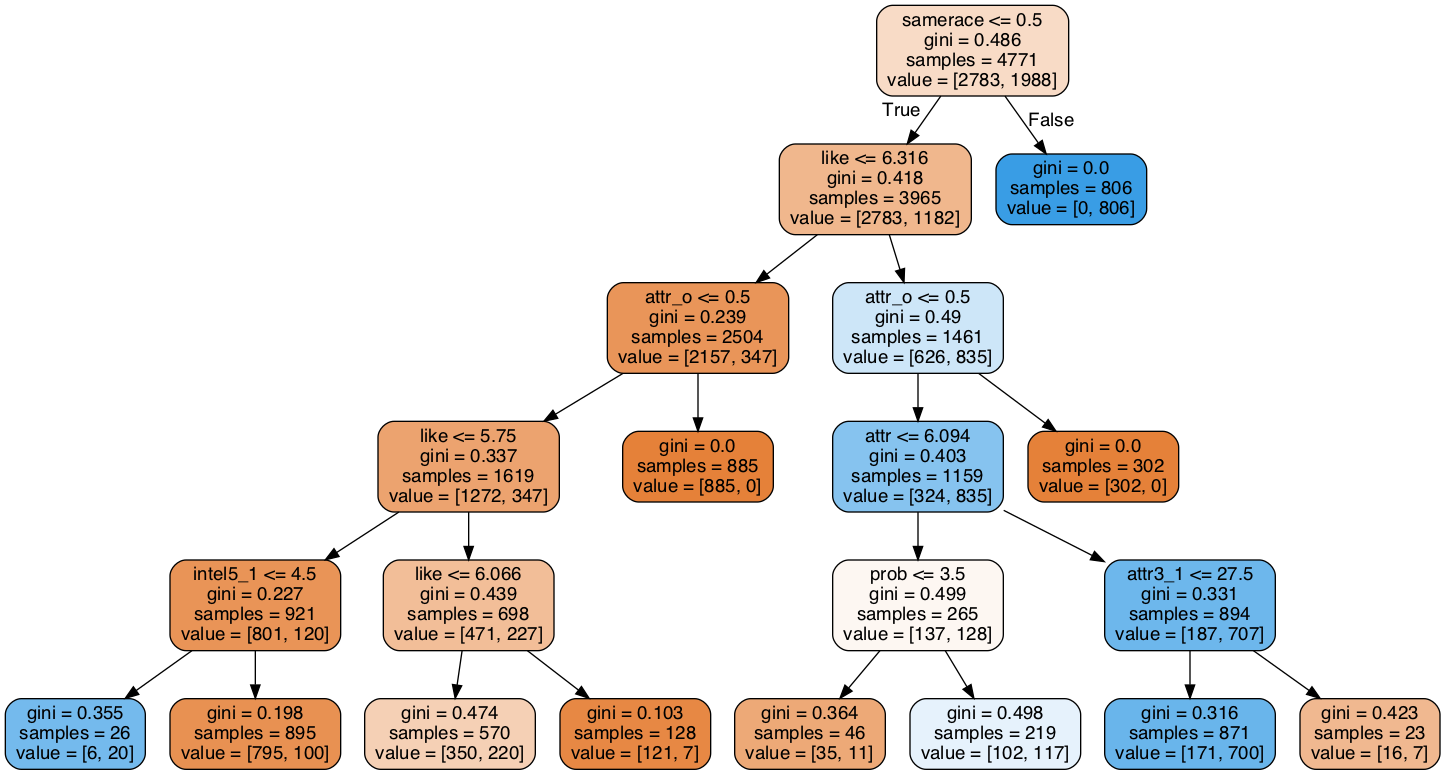

In [26]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Tuning max_depth

In [52]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='

In [53]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.027586,0.004396,0.003669,0.001674,1,{'max_depth': 1},0.750785,0.754974,0.747644,0.751312,...,0.752253,0.003169,39,0.752621,0.751572,0.753407,0.752488,0.751179,0.752253,0.000792
1,0.035783,0.000650,0.002525,0.000427,2,{'max_depth': 2},0.804188,0.780105,0.782199,0.814271,...,0.796060,0.013090,38,0.794025,0.800052,0.799528,0.791514,0.795181,0.796060,0.003273
2,0.046883,0.000526,0.002262,0.000089,3,{'max_depth': 3},0.863874,0.850262,0.845026,0.871983,...,0.859359,0.010080,11,0.858229,0.861635,0.862945,0.856207,0.857779,0.859359,0.002520
3,0.068430,0.006663,0.002930,0.000791,4,{'max_depth': 4},0.862827,0.851309,0.840838,0.876180,...,0.861035,0.013456,8,0.860849,0.863732,0.866352,0.857255,0.858041,0.861246,0.003424
4,0.076988,0.007882,0.002402,0.000112,5,{'max_depth': 5},0.861780,0.855497,0.843979,0.869885,...,0.860407,0.009965,10,0.869235,0.872117,0.878407,0.870089,0.868518,0.871673,0.003576


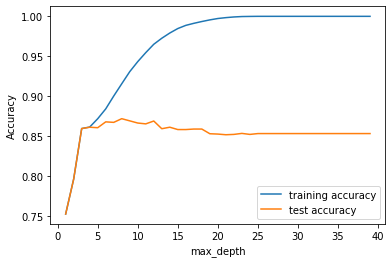

In [54]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [79]:
'''We can see that as we increase the value of max_depth, both training and test score increase till about max-depth = 10, after which the test score gradually reduces.'''

'We can see that as we increase the value of max_depth, both training and test score increase till about max-depth = 10, after which the test score gradually reduces.'

# Tuning min_samples_leaf

In [55]:
#The hyperparameter min_samples_split is the minimum no. of samples required to split an internal node. 
#Its default value is 2, which means that even if a node is having 2 samples it can be furthur divided into leaf nodes.

# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tru

In [50]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.158016,0.021591,0.002514,0.000392,5,{'min_samples_leaf': 5},0.854450,0.859686,0.838743,0.875131,...,0.856424,0.011680,8,0.949161,0.952568,0.954927,0.951021,0.959141,0.953364,0.003452
1,0.120743,0.012413,0.002540,0.000223,25,{'min_samples_leaf': 25},0.861780,0.854450,0.838743,0.866737,...,0.857891,0.010676,7,0.901205,0.900943,0.900681,0.893138,0.899948,0.899183,0.003052
2,0.092951,0.001004,0.002222,0.000055,45,{'min_samples_leaf': 45},0.867016,0.854450,0.851309,0.863589,...,0.860407,0.006325,6,0.880765,0.885744,0.881813,0.878470,0.883971,0.882153,0.002522
3,0.085052,0.003585,0.002236,0.000060,65,{'min_samples_leaf': 65},0.880628,0.858639,0.848168,0.868835,...,0.862503,0.011213,3,0.871331,0.878145,0.879193,0.871922,0.876637,0.875446,0.003228
4,0.080216,0.000615,0.002220,0.000045,85,{'min_samples_leaf': 85},0.879581,0.860733,0.840838,0.879328,...,0.865647,0.014325,1,0.871593,0.876310,0.875000,0.867732,0.874542,0.873035,0.003068


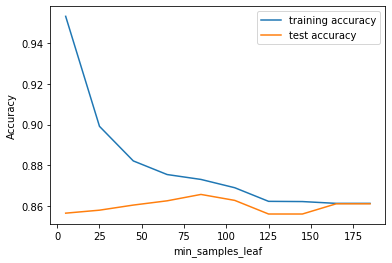

In [51]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [80]:
'''We can see that at low values of min_samples_leaf, the tree gets a bit overfitted. 
At values > 150, however, the model becomes more stable and the training and test accuracy start to converge.'''

'We can see that at low values of min_samples_leaf, the tree gets a bit overfitted. \nAt values > 150, however, the model becomes more stable and the training and test accuracy start to converge.'

# Tuning min_samples_split

In [56]:
#The hyperparameter min_samples_leaf indicates the minimum number of samples required to be at a leaf.
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tr

In [57]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.170685,0.018794,0.002808,0.000496,5,{'min_samples_split': 5},0.864921,0.839791,0.848168,0.857293,...,0.851603,0.008665,10,0.992400,0.988208,0.990304,0.990047,0.988476,0.989887,0.001505
1,0.252591,0.111979,0.002598,0.000430,25,{'min_samples_split': 25},0.870157,0.840838,0.854450,0.869885,...,0.859778,0.011061,1,0.948375,0.941562,0.941038,0.938973,0.939759,0.941941,0.003344
2,0.242476,0.034359,0.002523,0.000268,45,{'min_samples_split': 45},0.861780,0.840838,0.856545,0.869885,...,0.858939,0.010069,2,0.928459,0.924528,0.927673,0.923258,0.927449,0.926274,0.002013
3,0.215437,0.053531,0.002921,0.000387,65,{'min_samples_split': 65},0.852356,0.841885,0.855497,0.865687,...,0.854747,0.007801,9,0.911426,0.917453,0.916667,0.907805,0.909377,0.912545,0.003869
4,0.194311,0.021341,0.002487,0.000298,85,{'min_samples_split': 85},0.860733,0.852356,0.850262,0.860441,...,0.855795,0.004214,7,0.908281,0.912474,0.907495,0.902829,0.905972,0.907410,0.003145


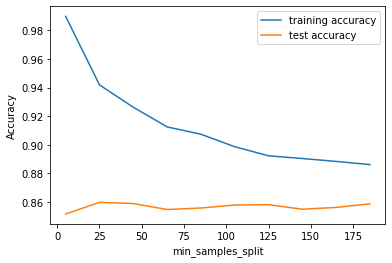

In [58]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



In [ ]:
#This shows that as we increase the min_samples_split, the tree overfits lesser since the model is less complex.

# Grid Search to Find Optimal Hyperparameters

In [59]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    7.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [60]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.070883,0.007859,0.002720,0.000412,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.868063,0.852356,0.838743,0.868835,0.866737,0.858939,0.011776,13
1,0.067295,0.005251,0.002652,0.000453,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.868063,0.852356,0.838743,0.868835,0.866737,0.858939,0.011776,13
2,0.074976,0.002429,0.002432,0.000167,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.862827,0.852356,0.840838,0.879328,0.866737,0.860407,0.013051,11
3,0.073485,0.002345,0.002777,0.000233,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.862827,0.852356,0.840838,0.879328,0.866737,0.860407,0.013051,11
4,0.104904,0.004186,0.002343,0.000088,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.872251,0.858639,0.846073,0.867786,0.870934,0.863131,0.009768,6
5,0.101272,0.010394,0.002371,0.000111,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.874346,0.858639,0.846073,0.867786,0.870934,0.863551,0.010187,1
6,0.086449,0.005263,0.002563,0.000339,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.872251,0.860733,0.840838,0.879328,0.864638,0.863551,0.013037,1
7,0.087221,0.005676,0.002314,0.000174,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.872251,0.860733,0.840838,0.879328,0.864638,0.863551,0.013037,1
8,0.061474,0.001585,0.002399,0.000046,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.860733,0.852356,0.840838,0.868835,0.866737,0.857891,0.010272,15
9,0.077185,0.006419,0.002634,0.000426,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.860733,0.852356,0.840838,0.868835,0.866737,0.857891,0.010272,15


In [61]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8635506183190107
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [62]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [63]:
# accuracy score
clf_gini.score(X_test,y_test)

0.8689486552567237

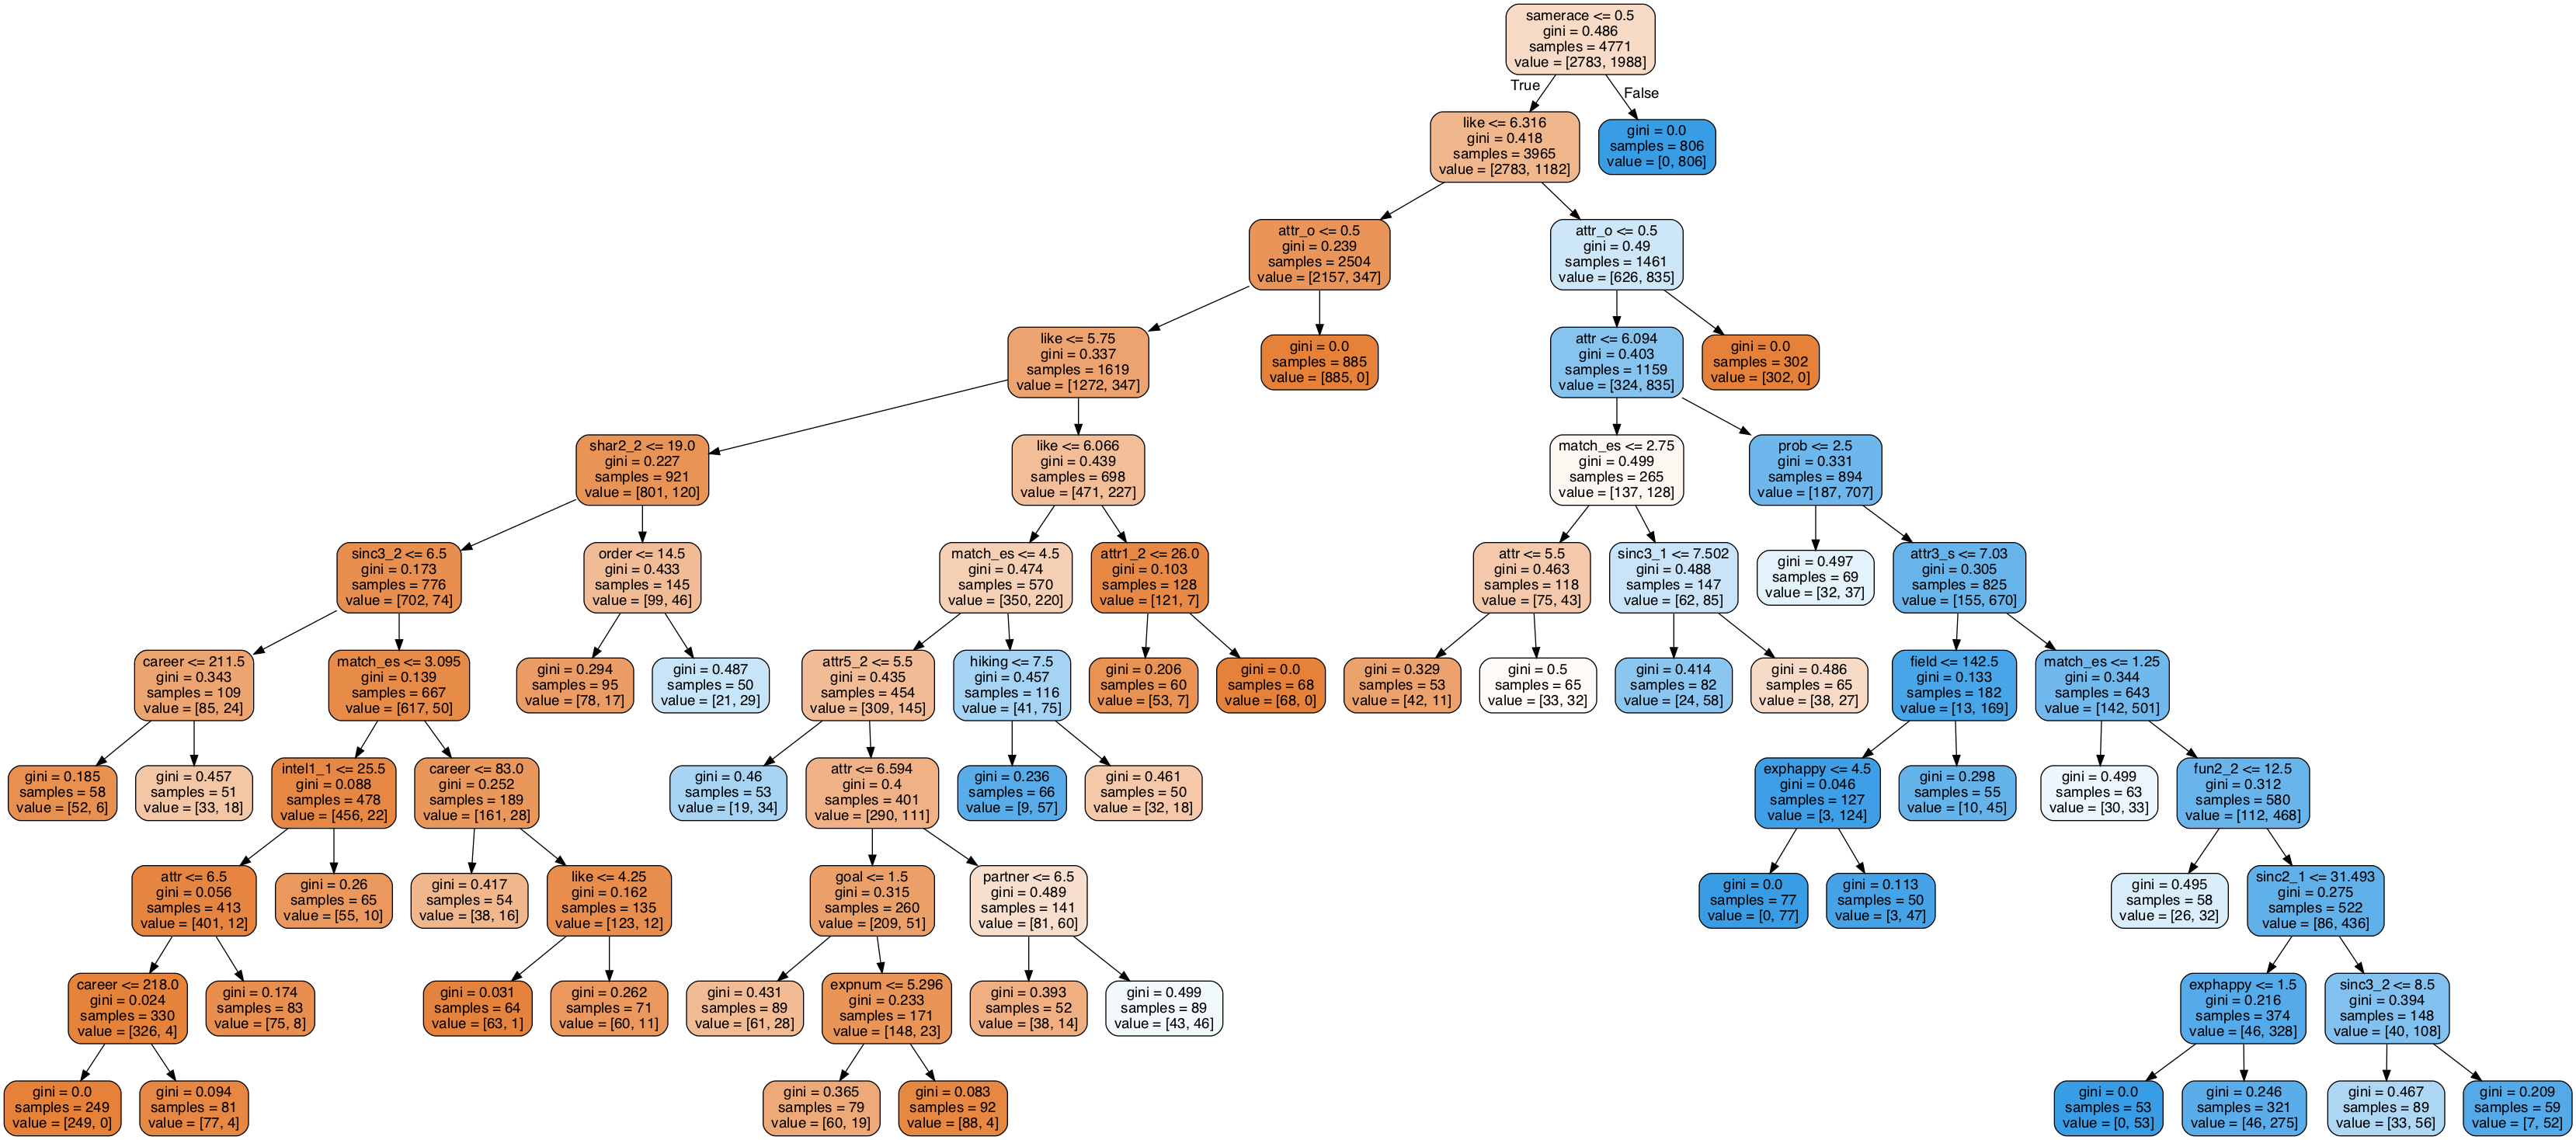

In [64]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [65]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.8523227383863081


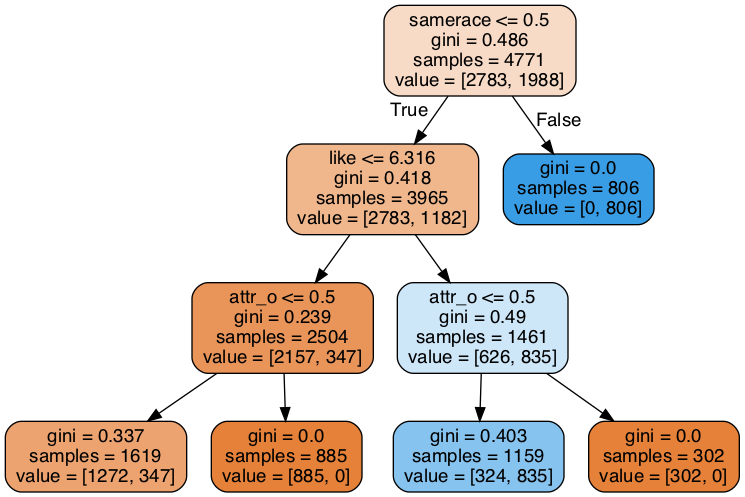

In [66]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [67]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1190
           1       0.84      0.80      0.82       855

    accuracy                           0.85      2045
   macro avg       0.85      0.84      0.85      2045
weighted avg       0.85      0.85      0.85      2045



In [68]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[1060  130]
 [ 172  683]]


# Training the Random Forest model

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rfc = RandomForestClassifier(n_estimators=600)

In [71]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Predictions and Evaluation of Random Forest

In [72]:
predictions = rfc.predict(X_test)

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1190
           1       0.91      0.83      0.87       855

    accuracy                           0.90      2045
   macro avg       0.90      0.89      0.89      2045
weighted avg       0.90      0.90      0.90      2045

